In [ ]:
import wrapper as w
from importlib import reload
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os
reload(w)

<module 'wrapper' from '/media/NAS/Tesis/NER/Stanford_NLP/wrapper.py'>

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('/media/NAS/Tesis/NER/data/CNB_data/JusticIA_DatosTranscripciones.csv')

In [5]:
texts = df[df['MetodoTexto']=='manual']['Texto'].tolist()

In [8]:
len(texts)

1000

In [6]:
res = w.make_prediction(texts)

500
export CLASSPATH=$CLASSPATH:/media/NAS/Tesis/NER/Stanford_NLP/stanford-corenlp-4.3.1/* && java -Xmx5g edu.stanford.nlp.pipeline.StanfordCoreNLP -props spanish -filelist list.txt


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.4 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.5 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

500
export CLASSPATH=$CLASSPATH:/media/NAS/Tesis/NER/Stanford_NLP/stanford-corenlp-4.3.1/* && java -Xmx5g edu.stanford.nlp.pipeline.StanfordCoreNLP -props spanish -filelist list.txt


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.4 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

0
continue due to size cero


In [7]:
f_num = []
for r in res:
    try:
        f_num.append(int(r['File']))
    except:
        print(r)
np.max(f_num)

999

In [9]:
res[0:10]

[{'Text': 'ADAME FLORE Samuél',
  'TAG': 'PERSON:0.29582698745401886\n',
  'File': 0},
 {'Text': 'COMUNISMO', 'TAG': '-\n', 'File': 0},
 {'Text': 'H-156 L-24', 'TAG': 'MISC:0.49141598573376805\n', 'File': 0},
 {'Text': '31', 'TAG': 'NUMBER:-1.0\n', 'File': 0},
 {'Text': '-67', 'TAG': 'NUMBER:-1.0\n', 'File': 0},
 {'Text': '28', 'TAG': 'NUMBER:-1.0\n', 'File': 0},
 {'Text': 'Atoyac', 'TAG': 'LOCATION:0.9964248916629248\n', 'File': 0},
 {'Text': 'de Alvarez\n', 'File': 0},
 {'Text': 'Gro', 'TAG': 'LOCATION:0.6250518813818232\n', 'File': 0},
 {'Text': 'Palacio', 'TAG': 'LOCATION:0.9913858011575509\n', 'File': 0}]

In [19]:
proc = ['']*len(df)
for r in res:
    if 'TAG' in r:
        proc[int(r['File'])] += f"{r['Text'].strip()}:{r['TAG'].strip()};"
    else:
        proc[int(r['File'])] += f"{r['Text'].strip()};"

In [20]:
df['NER_Stanfor'] = proc

In [21]:
df.to_csv('proc.csv')

In [7]:
dic_freqs.keys()

dict_keys(['PERSON', 'O', 'IDEOLOGY', 'MISC', 'NUMBER', 'CITY', 'LOCATION', 'ORGANIZATION', 'MONEY', 'TITLE', 'CRIMINAL_CHARGE', 'DATE', 'COUNTRY', 'NATIONALITY', 'RELIGION', 'CAUSE_OF_DEATH', 'STATE_OR_PROVINCE', 'PERCENT'])

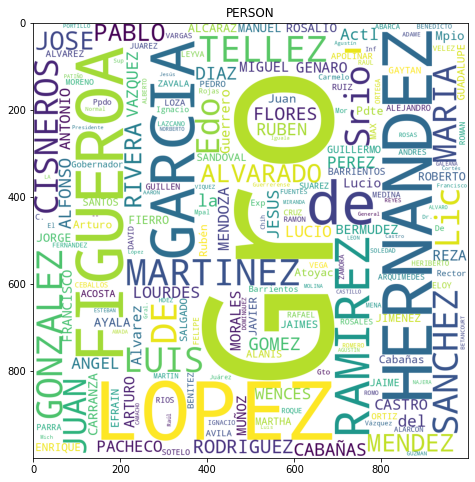

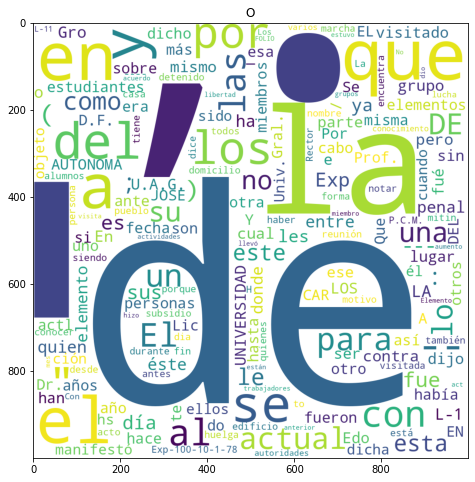

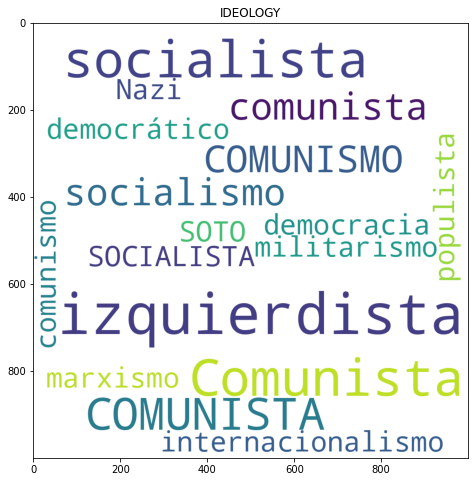

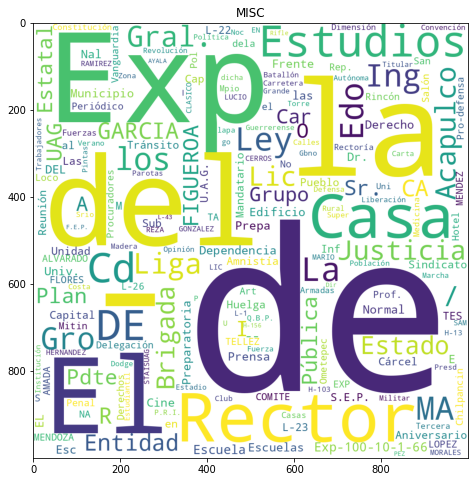

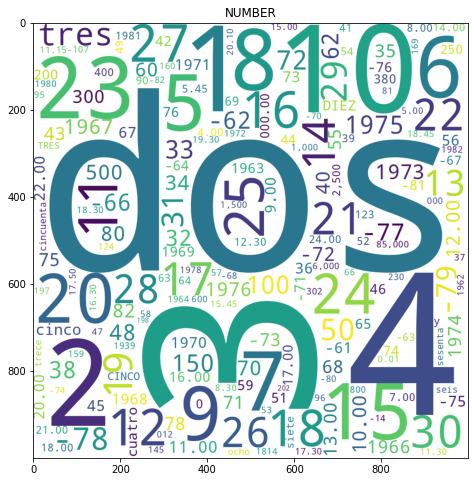

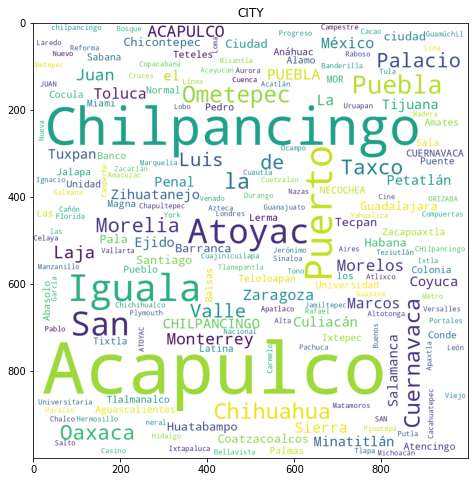

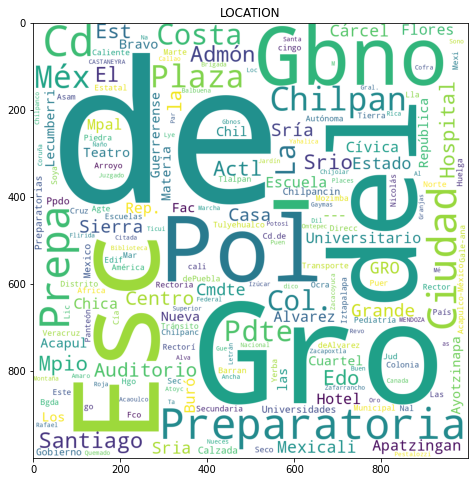

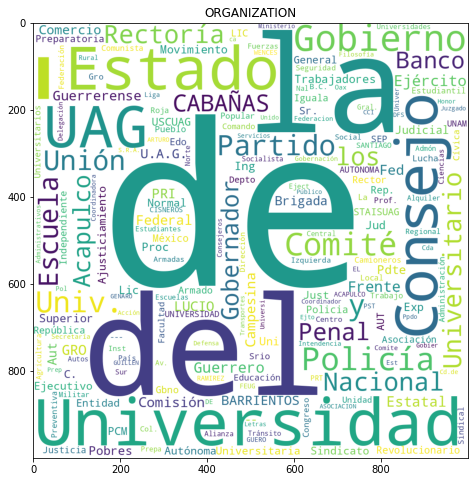

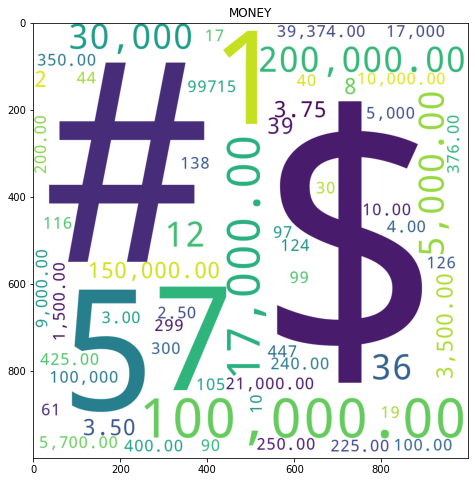

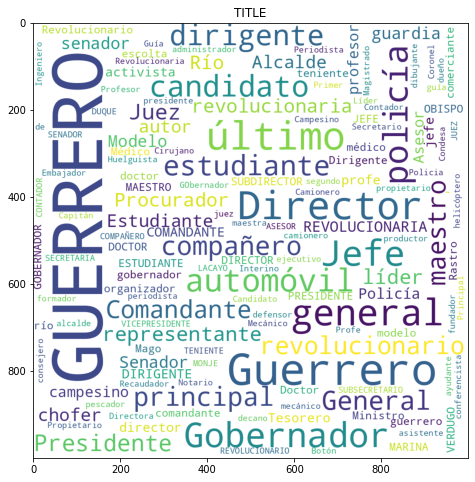

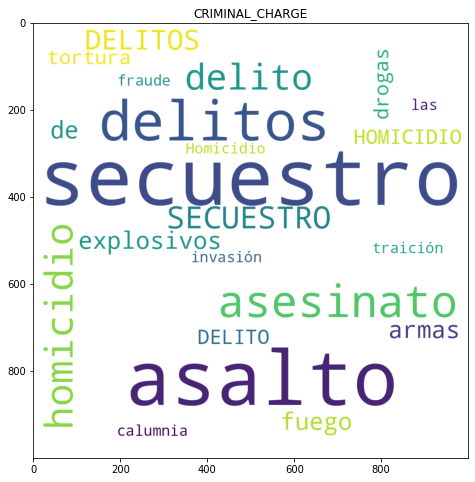

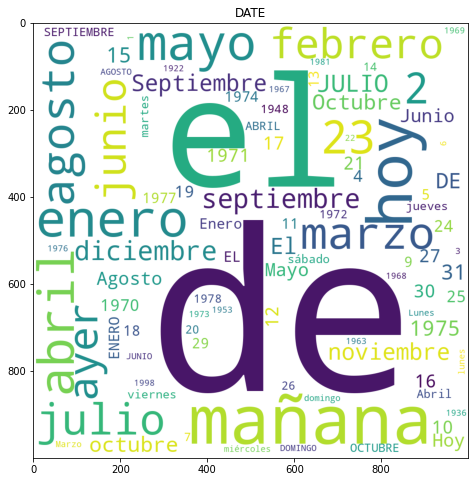

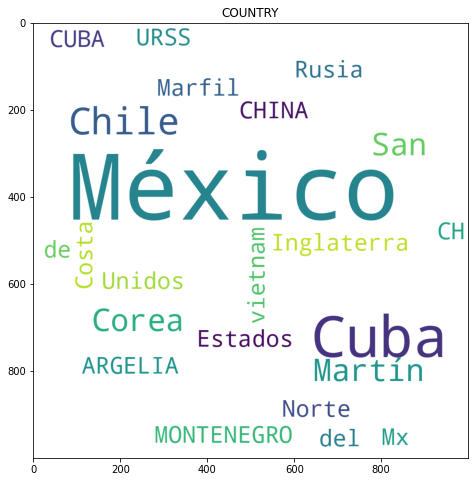

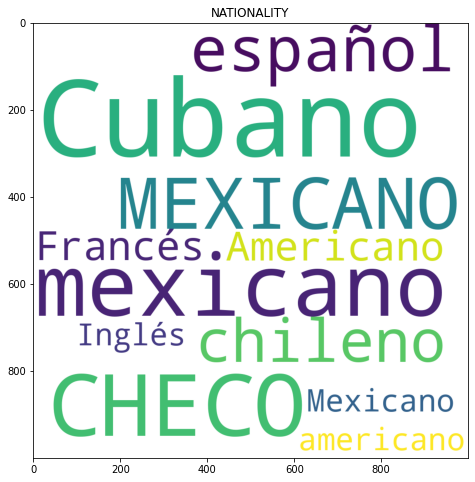

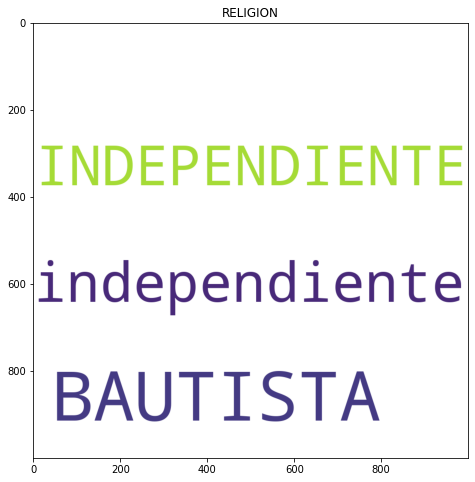

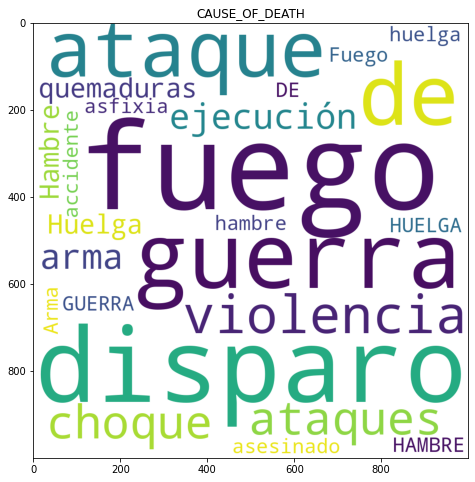

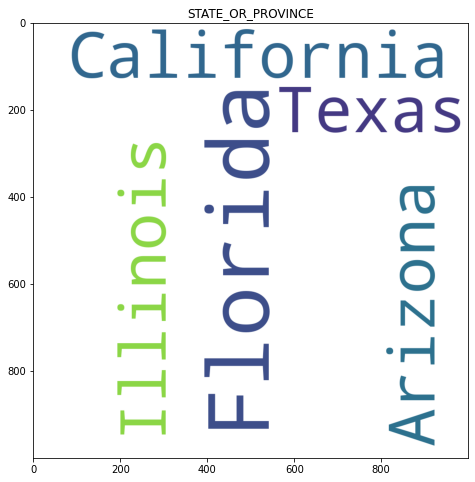

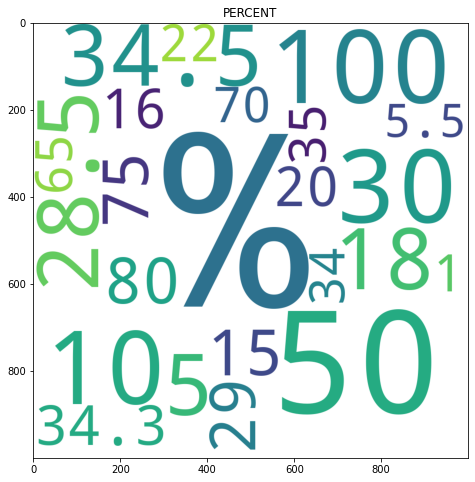

In [8]:
for k in dic_freqs:
    wordcloud = WordCloud(background_color="white",width=1000,height=1000).generate_from_frequencies(dic_freqs[k])
    plt.figure(figsize=(15,8))
    plt.title(k)
    plt.imshow(wordcloud)
    plt.savefig(f'NER_vocab/{k}.png')

In [19]:
def make_plots(texts, save_path, end=''):
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    res = w.make_prediction(texts, end=end)
    dic_freqs = {}
    for val in res:
        tag = val['NamedEntityTag']
        if tag[-1] == ']':
            tag = tag[:-1]
        if tag not in dic_freqs:
            dic_freqs[tag] = {}
        dic_freqs[tag][val['Text']] = dic_freqs[tag].get(val['Text'], 0) + 1
    for k in dic_freqs:
        wordcloud = WordCloud(background_color="white",width=1000,height=1000).generate_from_frequencies(dic_freqs[k])
        plt.figure(figsize=(15,8))
        plt.title(k)
        plt.imshow(wordcloud)
        plt.savefig(f'{save_path}/{k}.png')
    return res

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.4 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.5 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.4 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.4 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.4 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.5 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.5 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.5 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.4 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.4 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

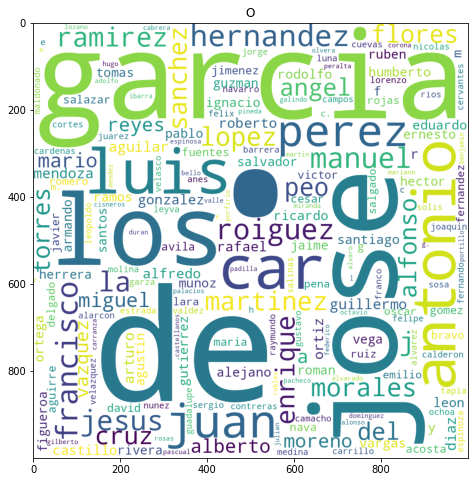

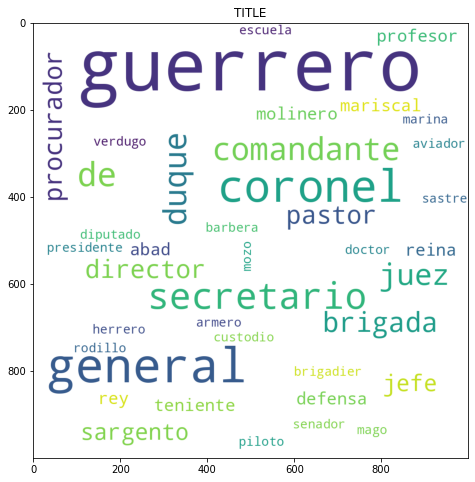

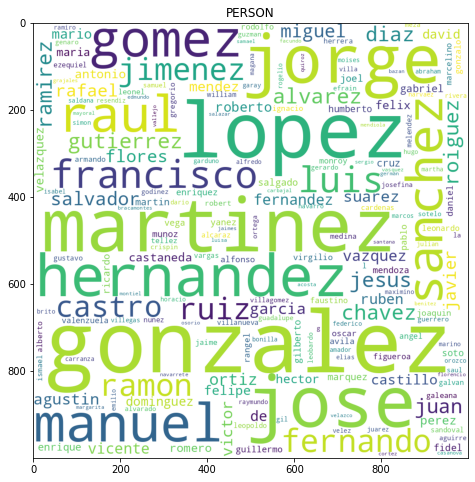

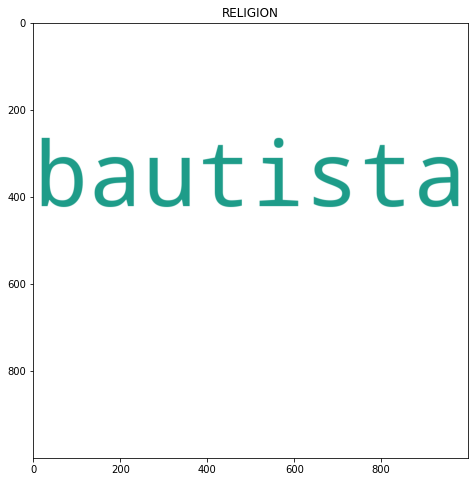

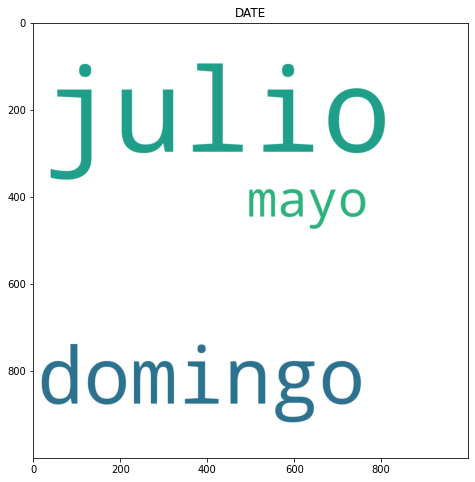

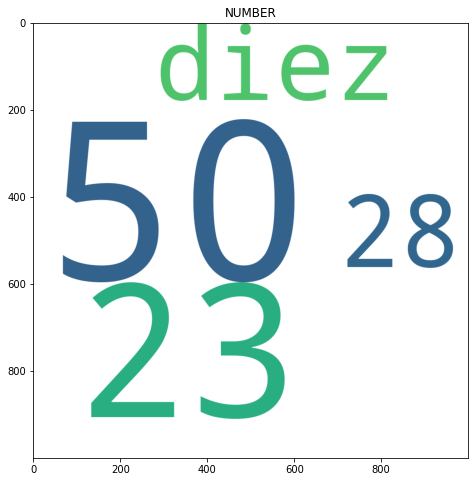

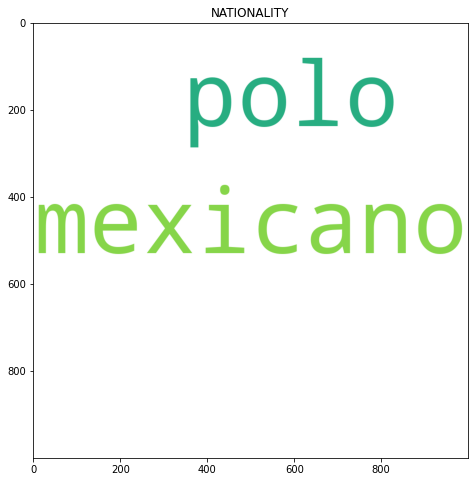

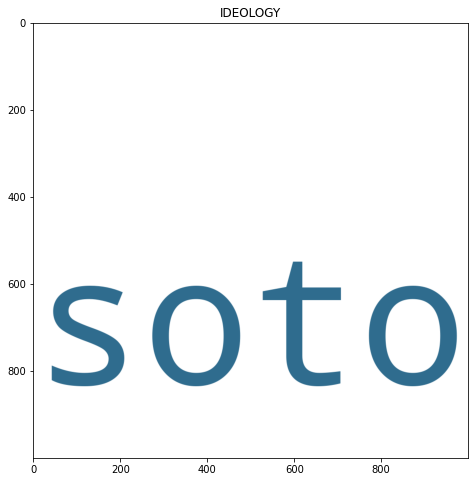

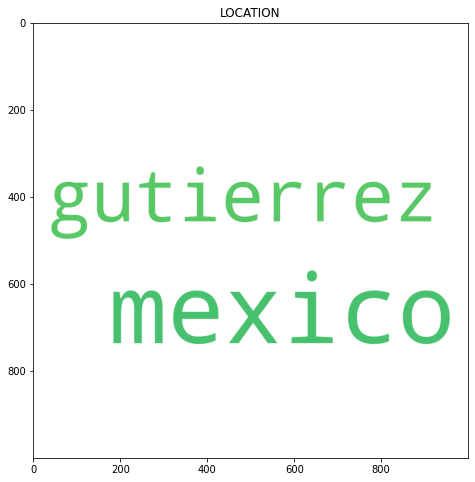

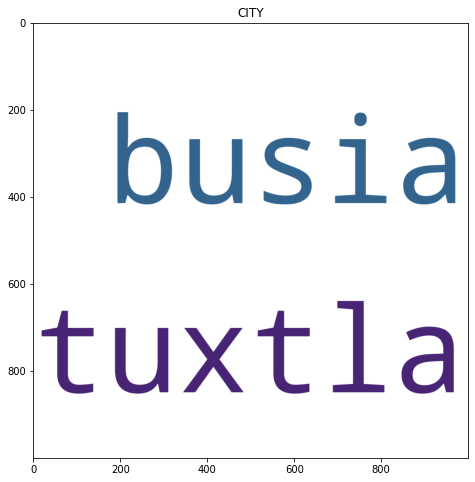

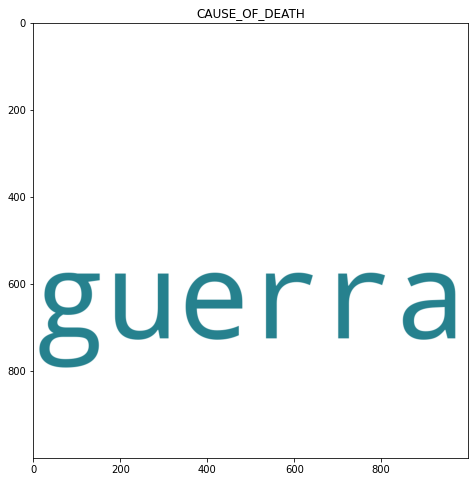

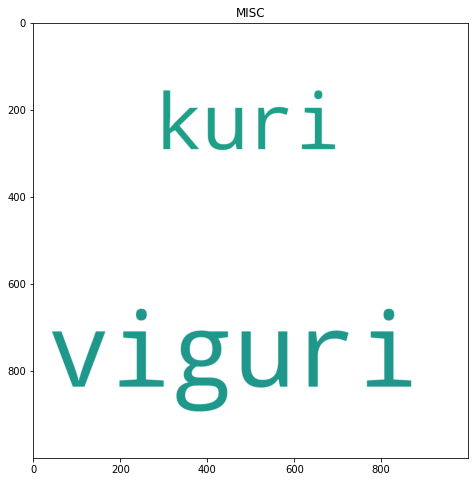

In [10]:
df = pd.read_csv('/media/windows/Tesis/NER/data/CNB_data/civilservants.csv')
l = df['CIVILSERVANTS '].tolist()
res = make_plots(l, 'civilservants_voc', end='.')

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.4 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.4 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.5 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.4 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.4 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

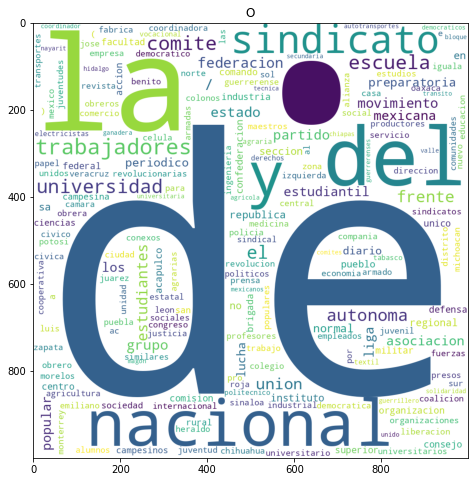

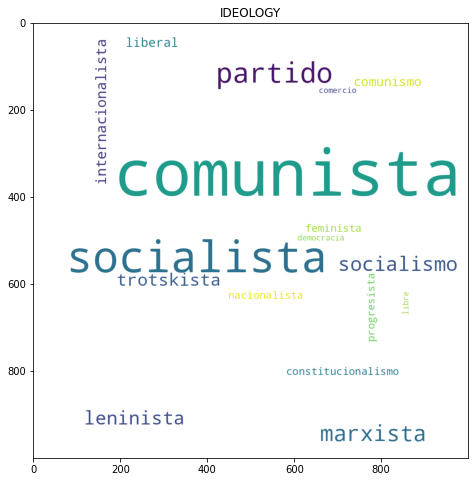

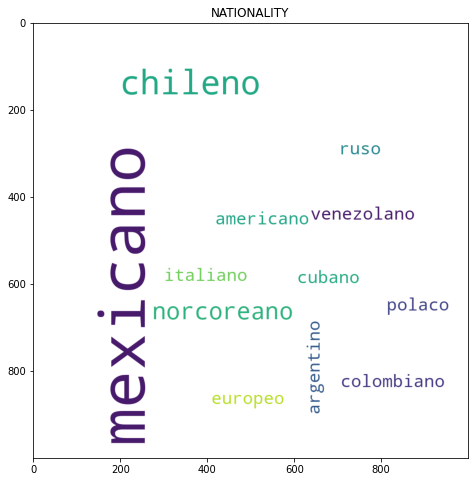

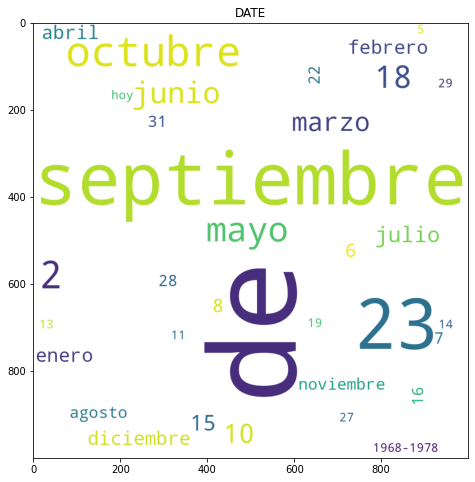

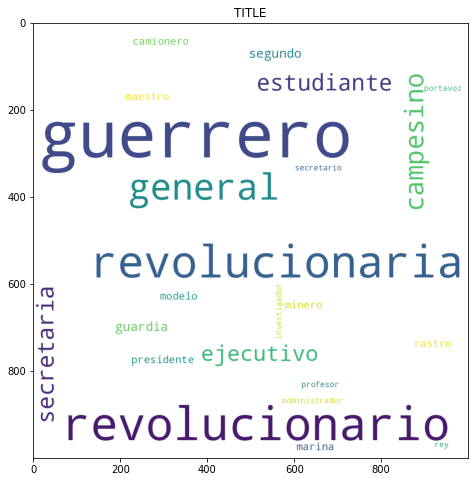

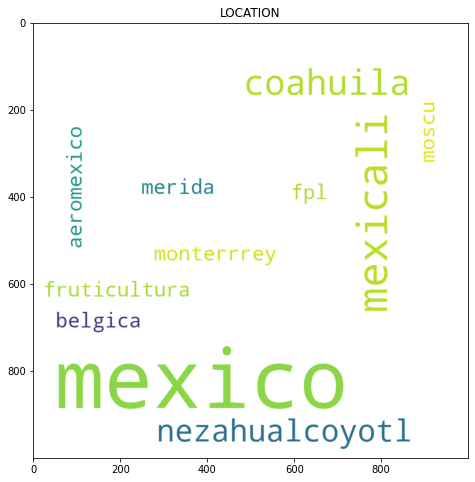

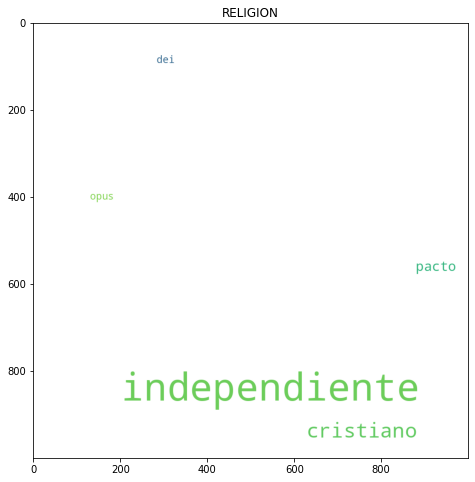

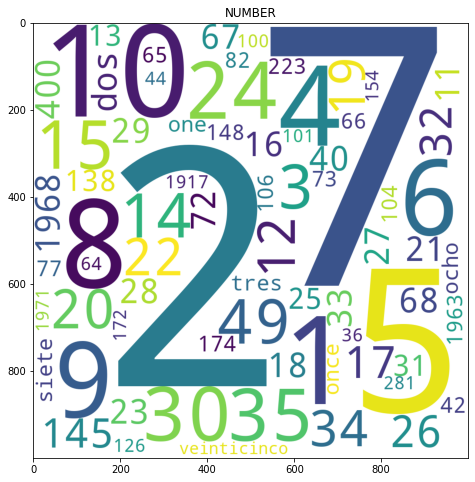

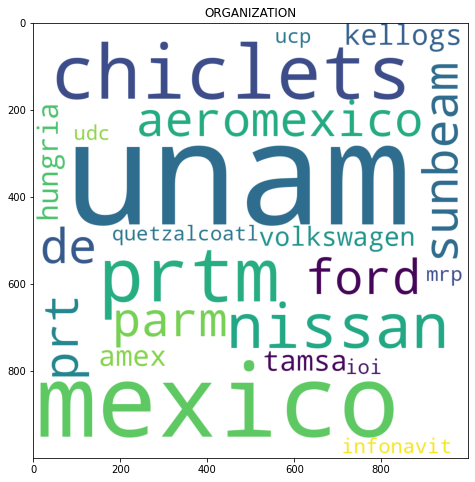

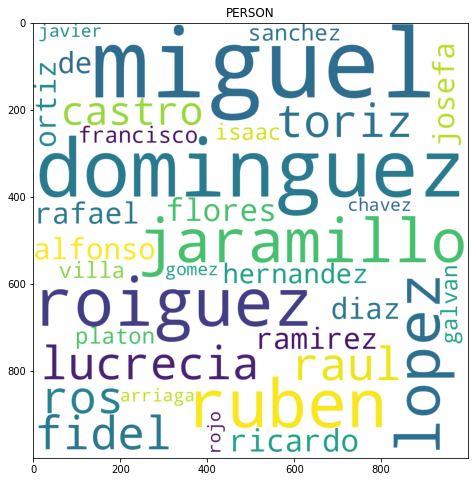

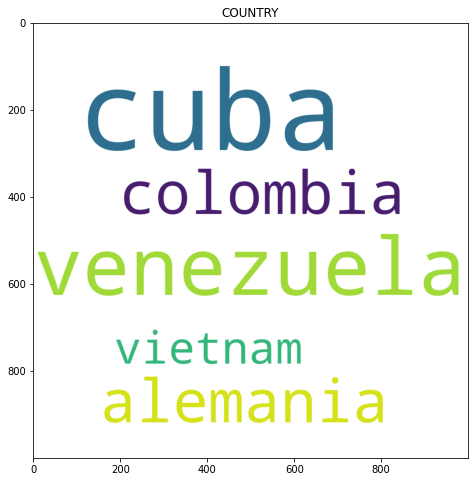

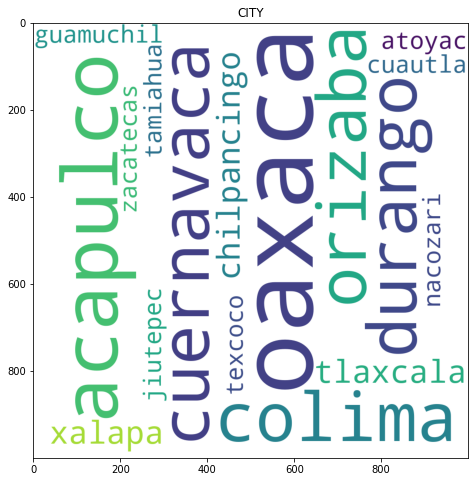

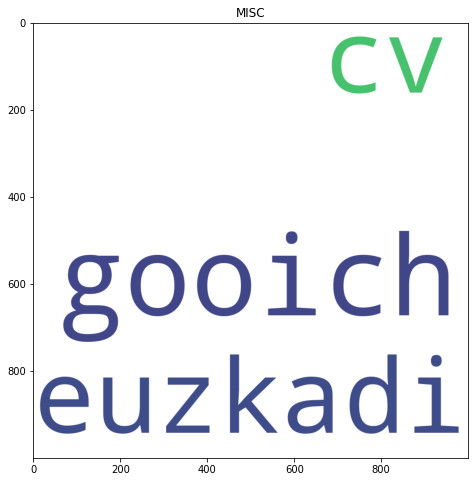

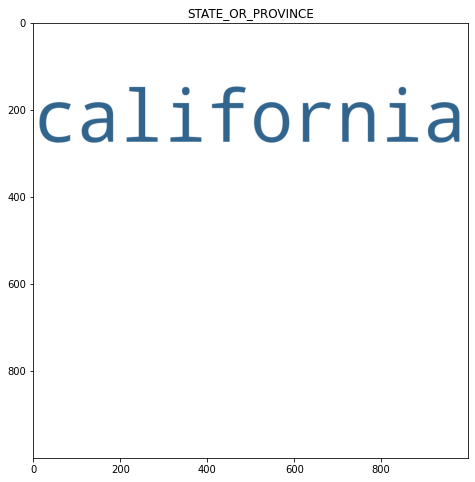

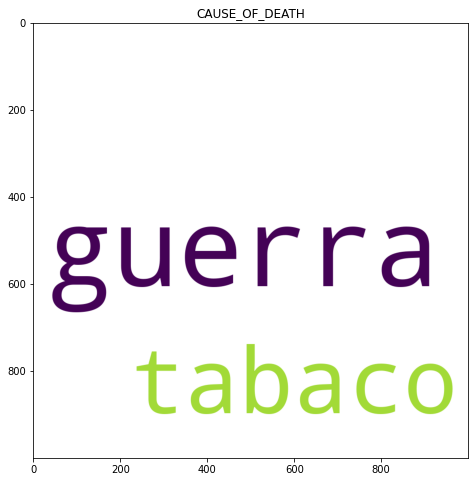

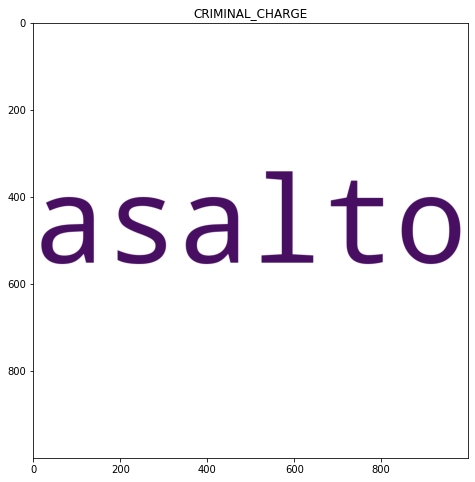

In [17]:
df = pd.read_csv('/media/windows/Tesis/NER/data/CNB_data/organizations.csv')
l = df['ORGANIZATIONS '].tolist()
res = make_plots(l, 'organizations_voc', end='.')

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.4 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.4 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.5 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.4 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.4 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.4 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.5 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.4 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.5 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

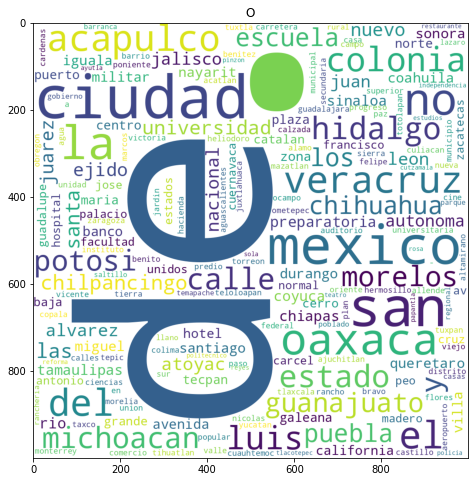

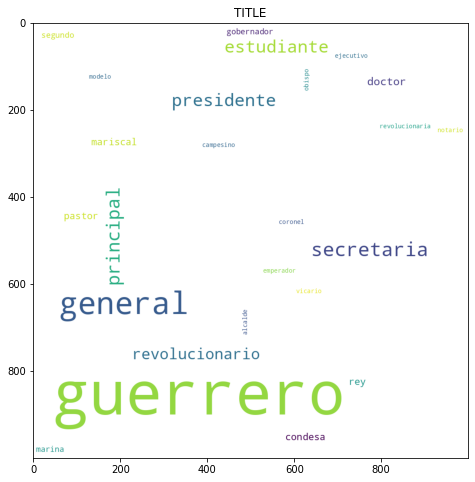

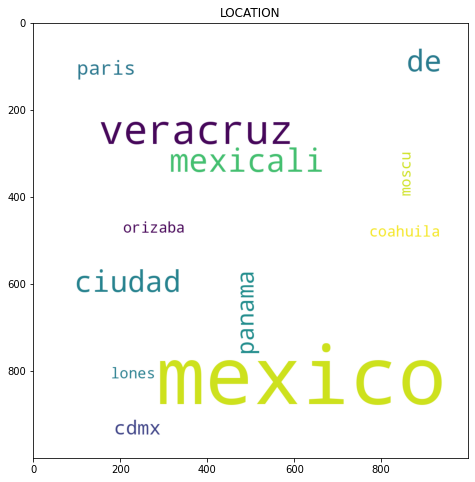

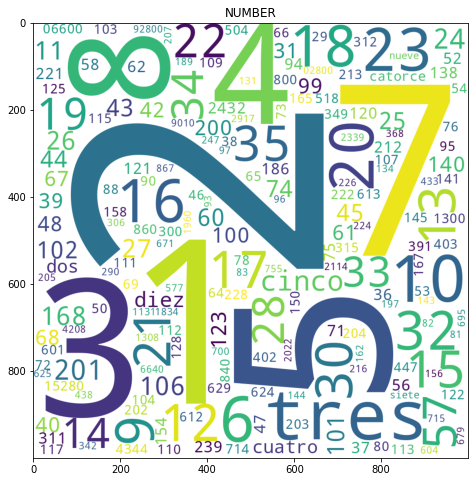

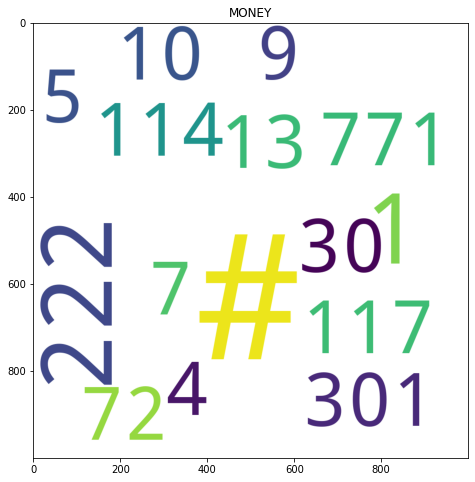

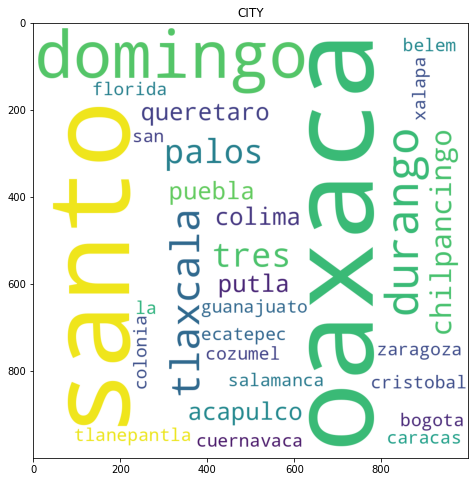

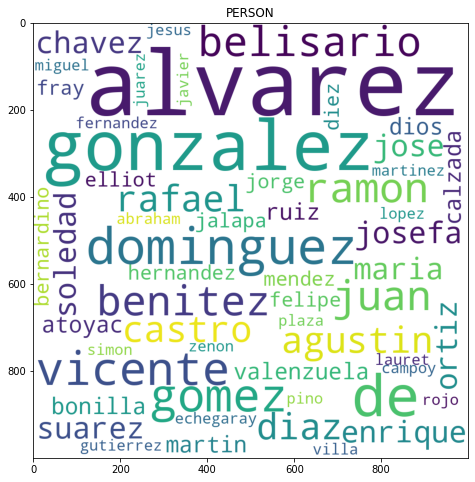

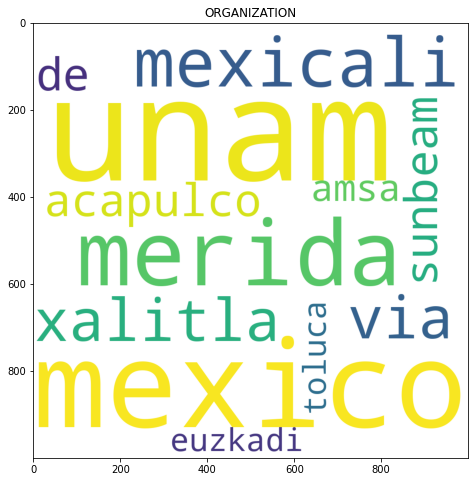

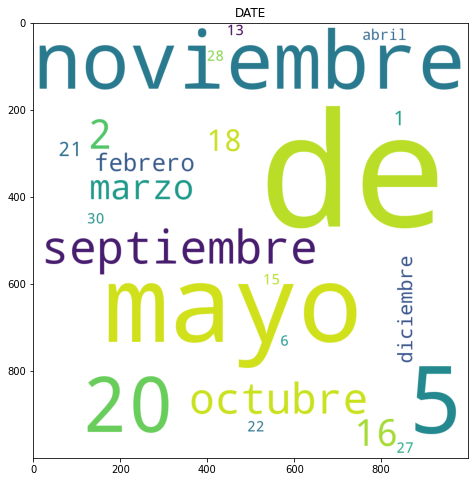

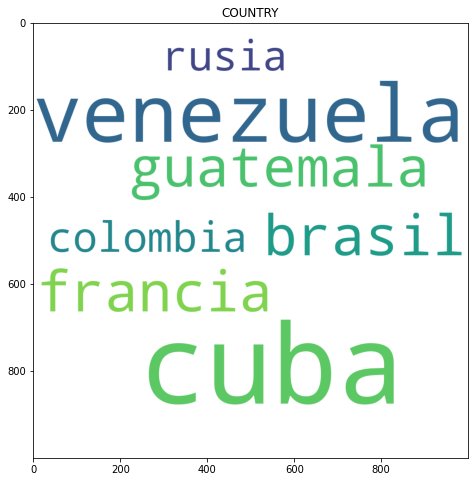

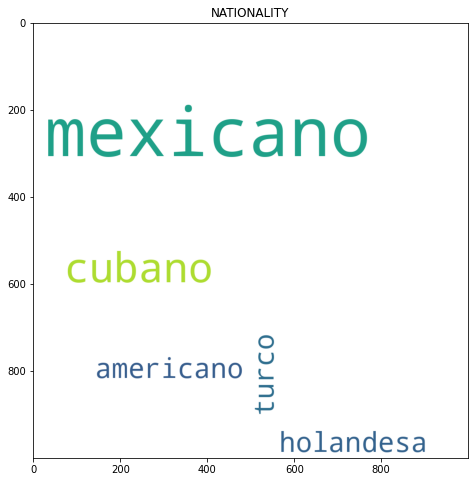

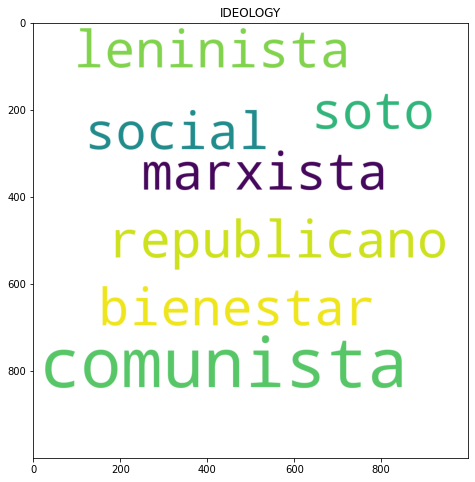

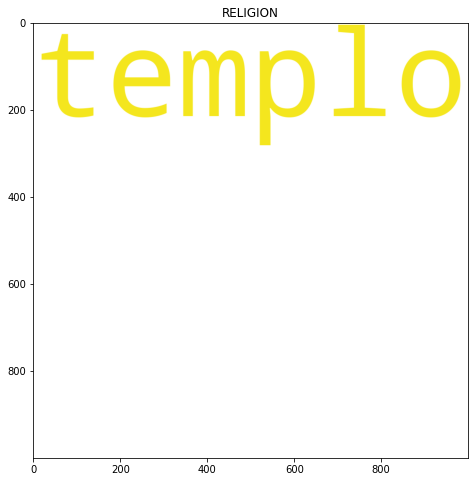

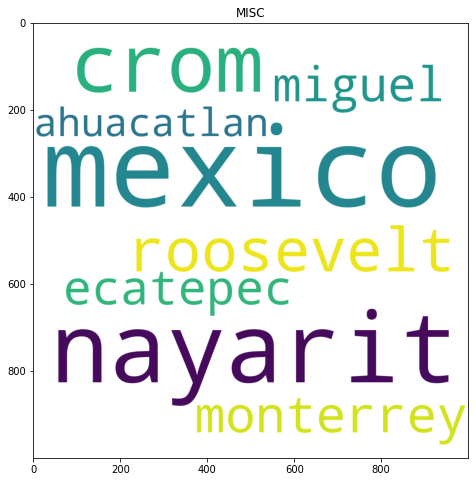

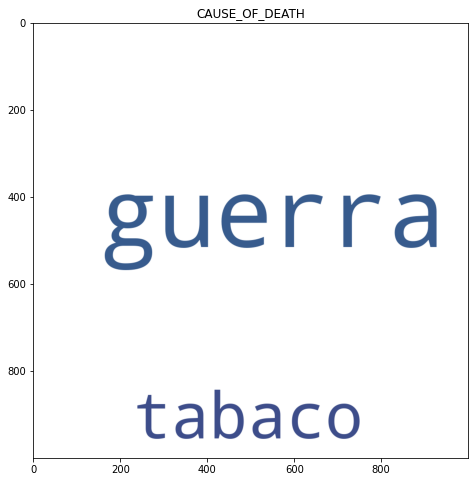

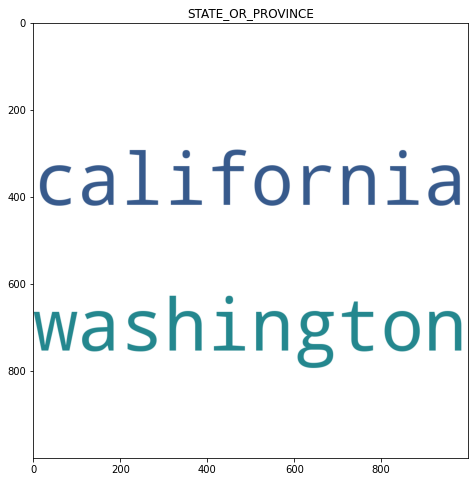

In [20]:
df = pd.read_csv('/media/windows/Tesis/NER/data/CNB_data/places.csv')
l = df['PLACES '].tolist()
res = make_plots(l, 'places_voc', end='.')

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.4 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.4 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.4 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.5 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.4 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.4 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.4 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.4 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.5 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.4 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.5 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.5 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.4 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.4 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.5 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.4 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.4 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.4 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.4 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.4 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.4 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.4 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.5 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.4 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.4 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.5 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.4 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.5 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.5 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.5 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.4 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.5 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.5 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

/media/NAS/Tesis/NER/Stanford_NLP


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator mwt
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/spanish-ud.tagger ... done [0.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.sequences.SeqClassifierFlags - sutime.language=spanish
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/spanish.ancora.distsim.s512.crf.ser.gz ... done [0.5 sec].
[main] INFO edu.stanford.nlp.time.JollyDayHolidays - Initializing JollyDayHoliday for SUTime from classpath edu/stanf

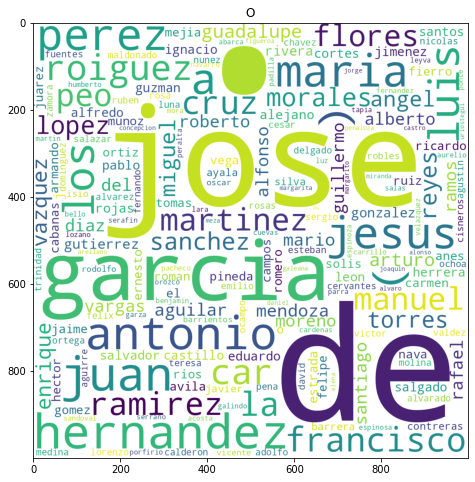

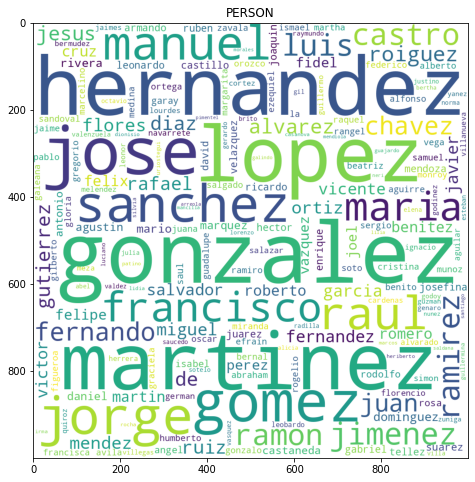

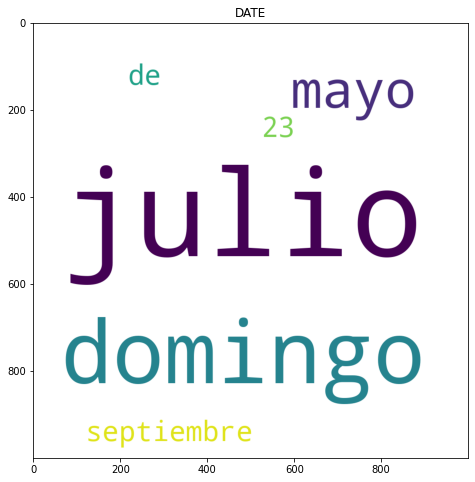

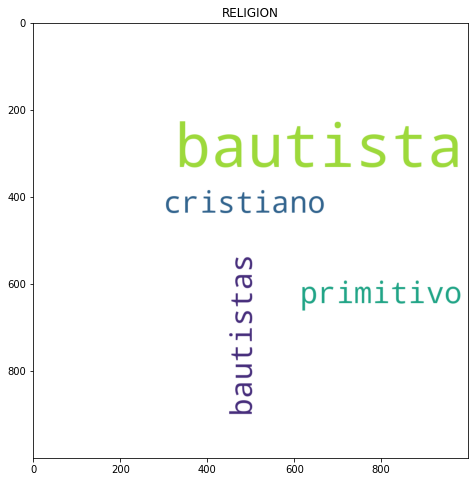

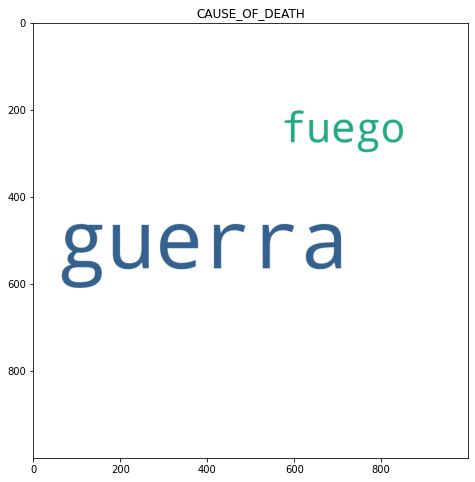

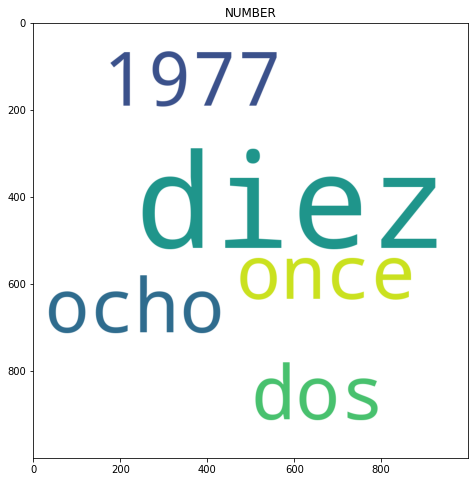

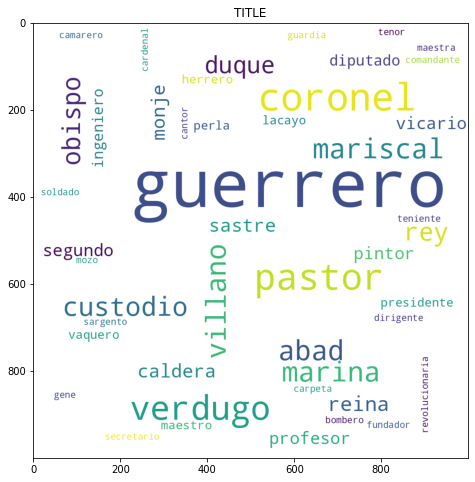

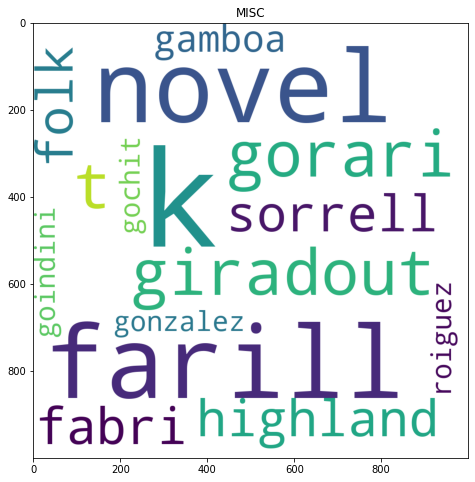

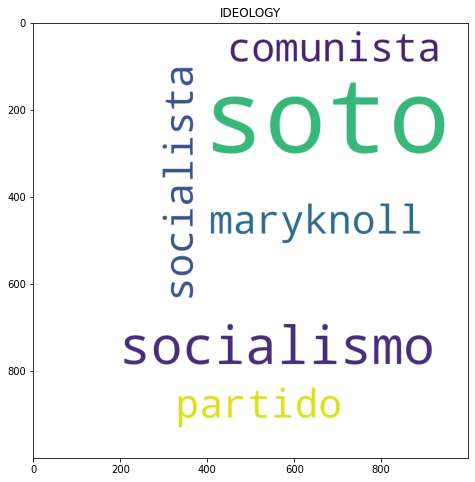

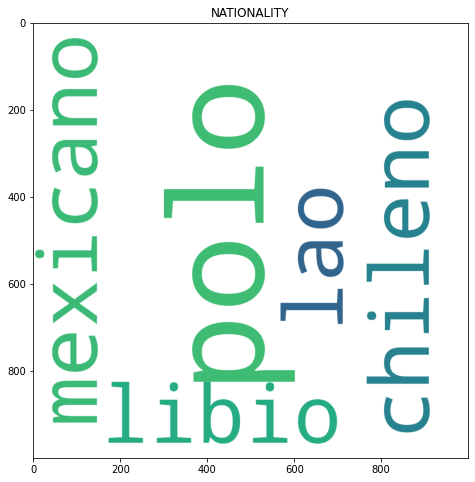

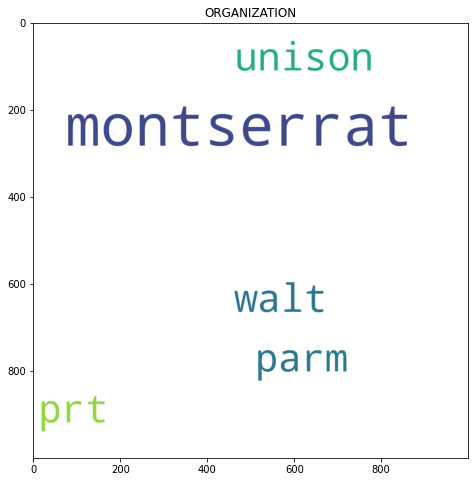

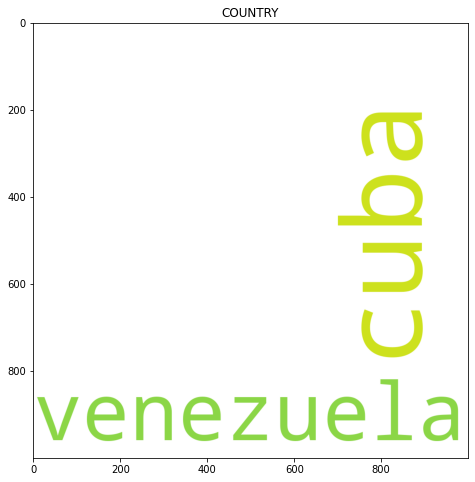

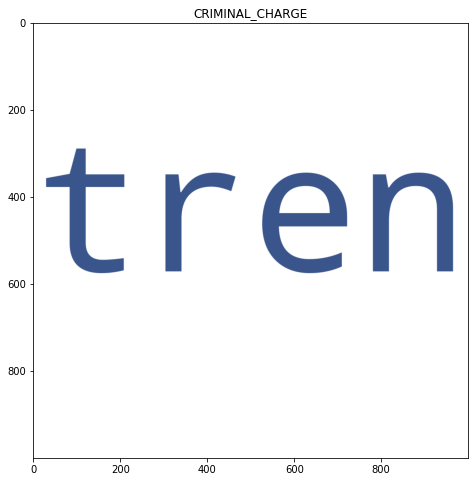

In [21]:
df = pd.read_csv('/media/windows/Tesis/NER/data/CNB_data/prosecuted.csv')
l = df['PROSECUTED '].tolist()
res = make_plots(l, 'prosecuted_voc', end='.')